### Table of contents
# 2. EXPLORING RELATIONSHIPS
### 2.1 Import assets
### 2.2 Creating subset
### 2.3 Correlation heatmap 
### 2.4 Scatterplot (net worth - age)
### 2.5 Pair Plots
### 2.6 Categorical plots
### 2.7 Revisit the questions you generated in the previous task.
### 2.8 Hypothesis

# 2.1 Import assets

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Import datasets
path = r'C:\Users\raque\Documents\Achievement 6\Forbes billionaires 1997-2023 analysis'
df_billio = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_billionaires_1997_2023_clean.csv'), index_col = False)

In [5]:
df_billio.shape

(31731, 14)

In [6]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN


# 2.2 Creating subset

In [7]:
# Create a subset with the relevant data for the relations analysis
df_relations = df_billio[['year', 'rank', 'net_worth_billions', 'age']]

In [8]:
df_relations

,year,rank,net_worth_billions,age
0,1997,1,2.0,73.0
1,1997,2,1.8,69.0
2,1998,1,3.3,65.0
3,1999,1,7.1,59.0
4,1999,2,2.9,53.0
...,...,...,...,...
31726,2023,2540,1.0,51.0
31727,2023,2540,1.0,80.0
31728,2023,2540,1.0,60.0
31729,2023,2540,1.0,71.0


In [9]:
# Filtering year 2023
df_2023 = df_billio.loc[df_billio['year'] == 2023]

In [10]:
# checking is been done correctly 
df_2023.shape

(2640, 14)

In [11]:
# Create a subset for 2023 with the relevant data for the relations analysis
df_2023_sub = df_2023[['rank', 'net_worth_billions', 'age']]

In [12]:
# Create a subset for 2023 with the relevant data for the relations analysis
df_2023_sub2 = df_2023[['year', 'rank', 'net_worth_billions', 'age']]

In [13]:
df_2023_sub.shape

(2640, 3)

# 2.3 Correlations heatmap

In [14]:
# Create a correlation matrix using pandas

df_relations.corr()

,year,rank,net_worth_billions,age
year,1.000000,0.503898,0.048185,0.111276
rank,0.503898,1.000000,-0.399495,-0.048751
net_worth_billions,0.048185,-0.399495,1.000000,0.059843
age,0.111276,-0.048751,0.059843,1.000000


In [15]:
# Create a subplot with matplotlib
#f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
#corr = sns.heatmap(df_relations.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

### Observation

The correlations are very weak. 
Because we have the same data for every single year, that's going to difficult a clear analysis of correlations... 
For that reason I'm going to make a subset of year 2023 only and re do the visualization. 

## Correlations heatmap 2023

In [16]:
# Create a correlation matrix using pandas

df_2023_sub.corr()

,rank,net_worth_billions,age
rank,1.000000,-0.448930,-0.142494
net_worth_billions,-0.448930,1.000000,0.066926
age,-0.142494,0.066926,1.000000


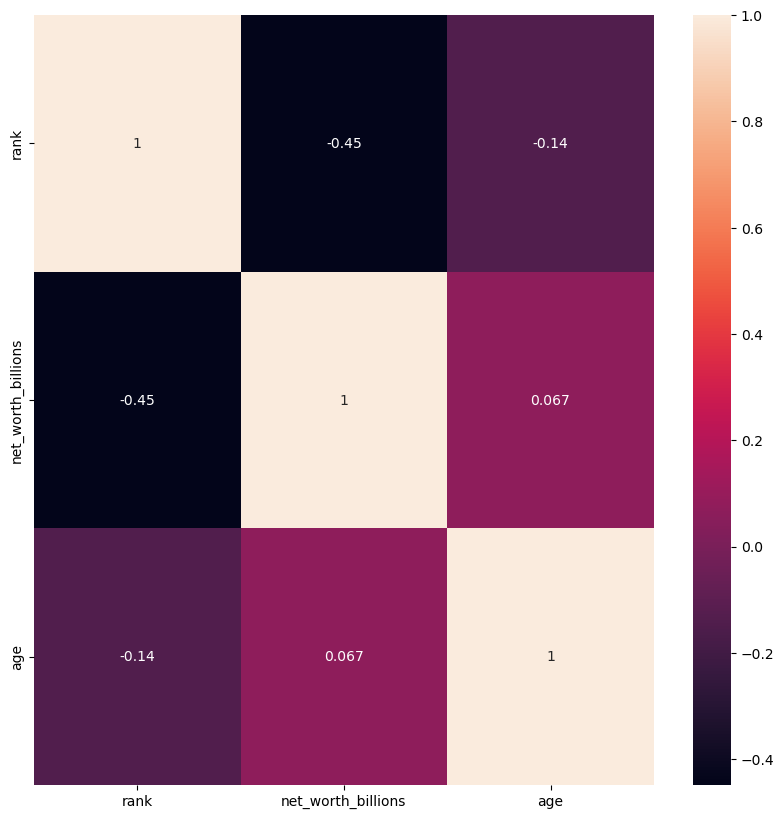

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr2023 = sns.heatmap(df_2023_sub.corr(), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [18]:
# Export correlation heatmap
corr2023.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation_heatmap.png'))

### Observation

There aren't strong correlation between the numerical variables. But I would like to keep exploring the relationship between age and net worth.

# 2.4 Scatterplot

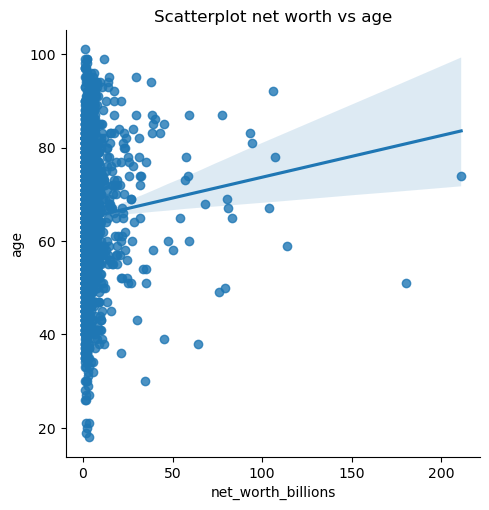

In [19]:
# Scatterplot exploring the relationship between age and net worth

scatter1 = sns.lmplot(x = 'net_worth_billions', y = 'age', data = df_2023_sub).set(title='Scatterplot net worth vs age')

In [20]:
# Export scatterplot
scatter1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))

### Observation

It's well spread vertically. I get the impression there's more people over 50's. But it's hard to tell. Most of the billionaires seem to have a net worth below 50, it shows rather cluttered in the visualization because we can see up to 200 B net worth. I'd like to make a smaller subset to analyze where most of the variables are. 

In [21]:
# Create a smaller net worth subset filtering under 50B in net_worth. 
df_2023_nw50 = df_2023_sub.loc[df_2023_sub['net_worth_billions'] < 50.0]

In [22]:
df_2023_nw50.head()

,rank,net_worth_billions,age
29114,24,47.2,60.0
29115,25,45.1,85.0
29116,26,45.0,39.0
29117,27,42.9,83.0
29118,28,40.1,86.0


In [23]:
df_2023_nw50.shape

(2617, 3)

### Scatterplot age and net worth (under 50B)

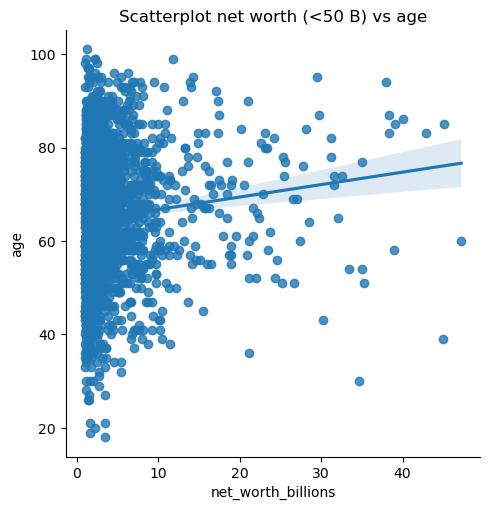

In [24]:
# Scatterplot exploring the relationship between age and net worth

sns.lmplot(x = 'net_worth_billions', y = 'age', data = df_2023_nw50).set(title='Scatterplot net worth (<50 B) vs age')

### Scatterplot age and net worth (under 10B)

In [25]:
# Create a smaller net worth subset filtering under 50B in net_worth. 
df_2023_nw10 = df_2023_sub.loc[df_2023_sub['net_worth_billions'] < 10.0]

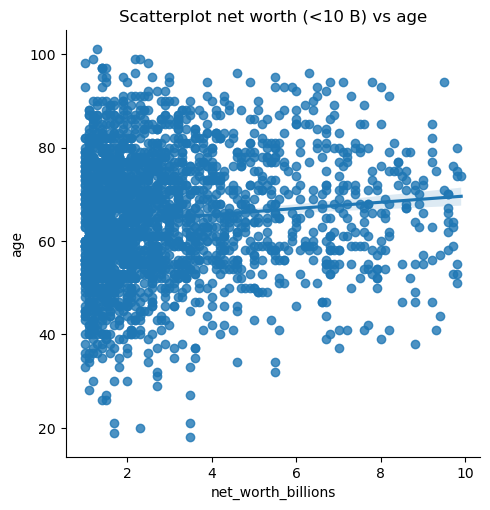

In [26]:
# Scatterplot exploring the relationship between age and net worth

scatter10 = sns.lmplot(x = 'net_worth_billions', y = 'age', data = df_2023_nw10).set(title='Scatterplot net worth (<10 B) vs age')

In [27]:
# Create a smaller net worth subset filtering under 50B in net_worth. 
df_2023_nw5 = df_2023_sub.loc[df_2023_sub['net_worth_billions'] < 5.0]

In [28]:
# Export scatterplot
scatter10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_under10B.png'))

### Scatterplot age and net worth (under 5B)

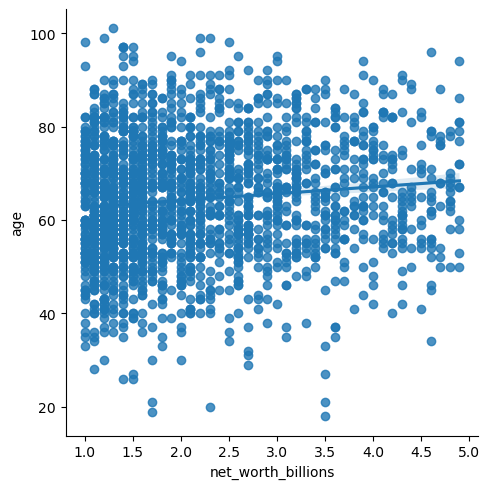

In [29]:
# Scatterplot exploring the relationship between age and net worth

sns.lmplot(x = 'net_worth_billions', y = 'age', data = df_2023_nw5)

### Observations

There isn't a clear correlation with this two variables. But we can observe that the closer we zoom in to where the majority of the values are, we can see how most of them are above 40 years old. It would be interesting to explore the age distribution with other visualization, as well as comparing age and net worth between self made and inherited fortunes.
I'll add the following to the key questions: 
- What are the differences between age distribution and for self-made and inherited fortunes. 
- What’s the average age for self-made billionaires?

# 2.5 Pair Plots


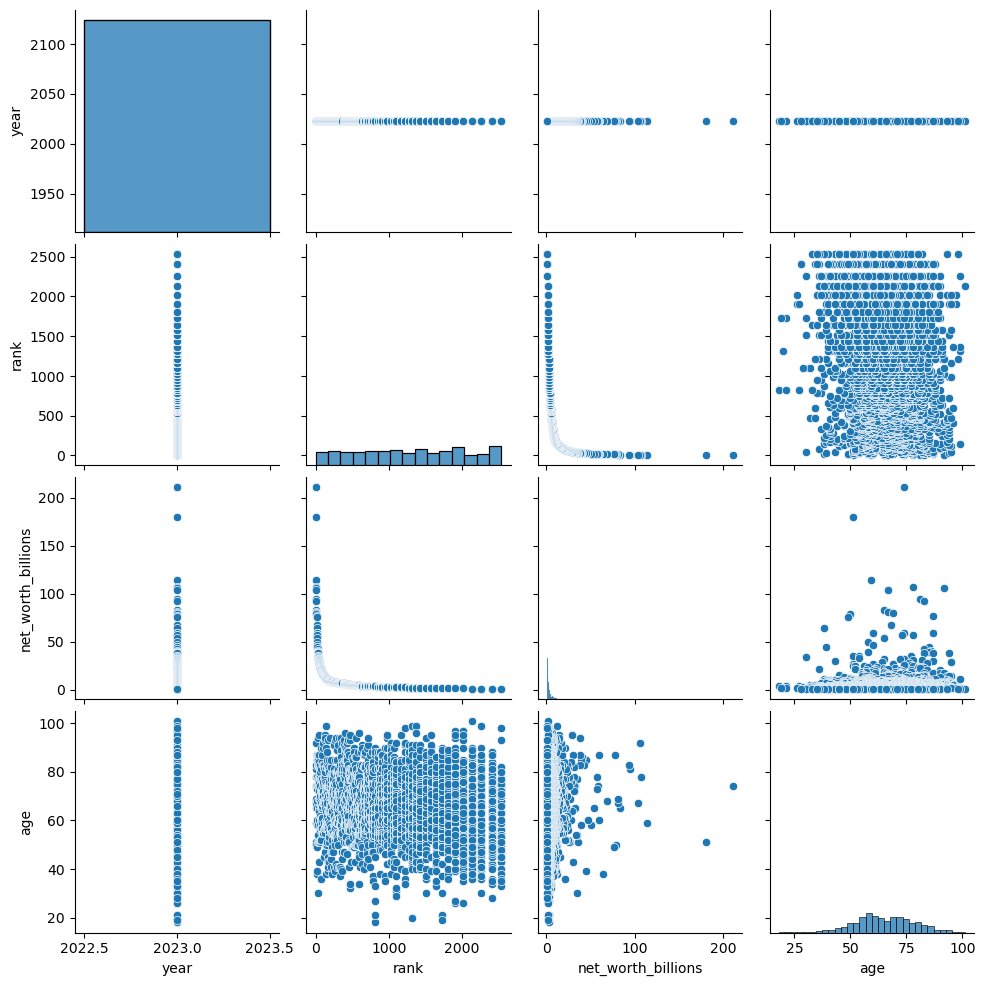

In [30]:
# Create a pair plot 

pairplot = sns.pairplot(df_2023_sub2)

In [31]:
# Export pairplot
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

With the limited amount of quantitative variables in this dataset and the lack of correlations, there aren't new conlusions to be drawn with this visualization. 

# 2.6 Categorical plots

### Age - Net Worth

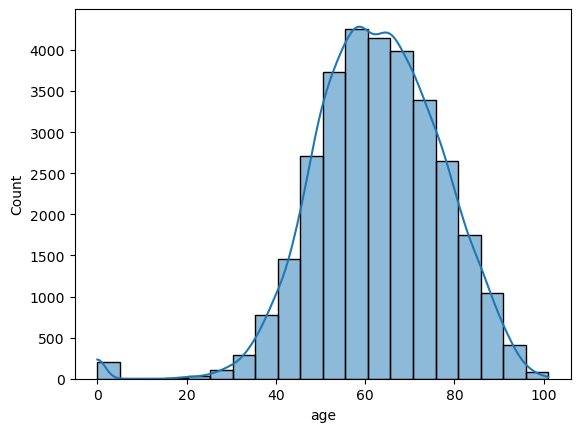

In [32]:
# Creating a histogram to visualize the distribution of the variables 
# To determine sensible categories for the age ranges.
# The argument "kde" add a line that encompasses the distribution

hist_age = sns.histplot(df_billio['age'], bins = 20, kde = True)

In [33]:
# Export correlation heatmap
hist_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1_hist_age.png'))

In [34]:
# Creating age ranges
df_billio.loc[df_billio['age'] < 30, 'age_range'] = '<30'
df_billio.loc[(df_billio['age'] >= 30) & (df_billio['age'] < 40), 'age_range'] = '30-40'
df_billio.loc[(df_billio['age'] >= 40) & (df_billio['age'] < 50), 'age_range'] = '40-50'
df_billio.loc[(df_billio['age'] >= 50) & (df_billio['age'] < 60), 'age_range'] = '50-60'
df_billio.loc[(df_billio['age'] >= 60) & (df_billio['age'] < 70), 'age_range'] = '60-70'
df_billio.loc[df_billio['age'] >= 70, 'age_range'] = '>70'

In [35]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status,age_range
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN,>70
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN,60-70
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN,60-70
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN,50-60
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN,50-60


In [36]:
df_billio['age_range'].value_counts(dropna = False)

age_range
>70      10095
60-70     8230
50-60     7796
40-50     3717
30-40      889
NaN        675
<30        329
Name: count, dtype: int64

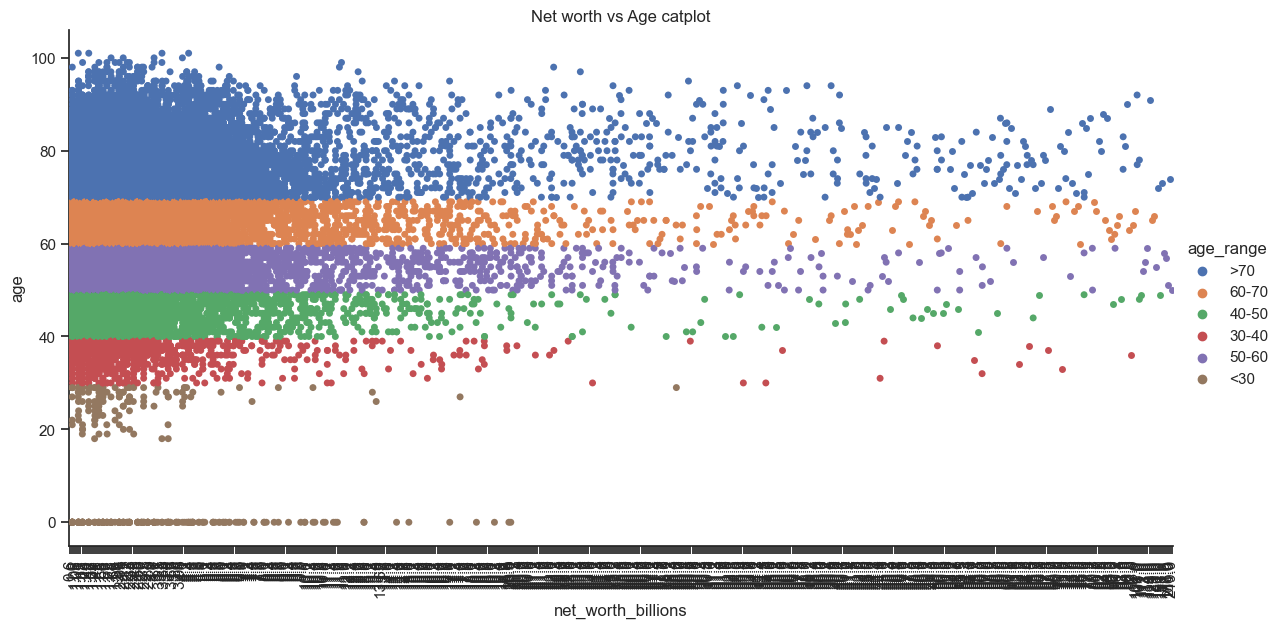

In [37]:
# Create a categorical plot in seaborn using the age_range created above

sns.set(style="ticks")
catplot_age = sns.catplot(x="net_worth_billions", y="age", hue="age_range", data=df_billio, height=6, aspect=2).set(title='Net worth vs Age catplot')
catplot_age.set_xticklabels(rotation=90) 

In [38]:
# Export catplot
catplot_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1_catplot_age.png'))

### Observations

We can observe very clearly the age spread in this graphic.
We have the inherited family fortunes down at the bottom from birth. 
We see how wealth tends to grow with age, having bigger amounts of big fortunes over 50 years olds. 

## Gender - Net Worth

[Text(0.5, 1.0, 'Gender histogram')]

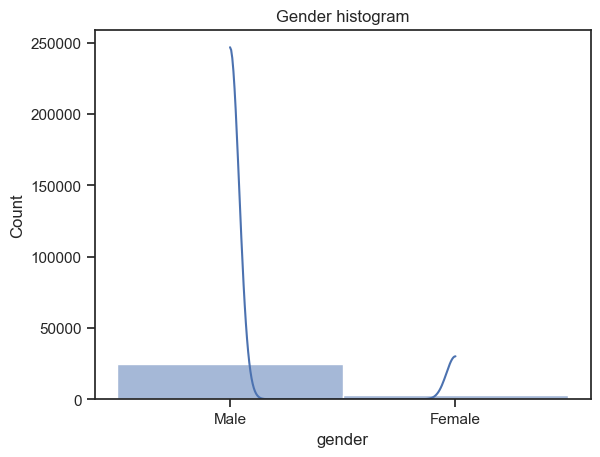

In [39]:
# Creating a histogram to visualize the distribution of the variables 

sns.histplot(df_billio['gender'], bins = 20, kde = True).set(title='Gender histogram')

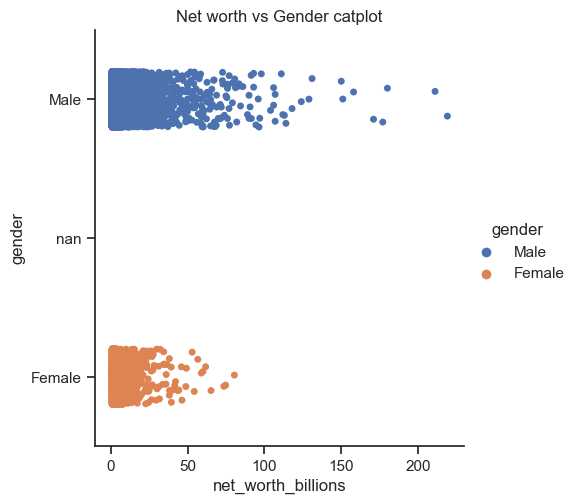

In [40]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
catplot_gender = sns.catplot(x="net_worth_billions", y="gender", hue="gender", data=df_billio).set(title='Net worth vs Gender catplot')

In [41]:
# Export catplot
catplot_gender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2_catplot_gender.png'))

### Observations

There's a big majority of males. 
And no females go above 80 B fortunes, as opposed to men that go above 200 B. 

## Year - Net Worth

[Text(0.5, 1.0, 'Year histogram')]

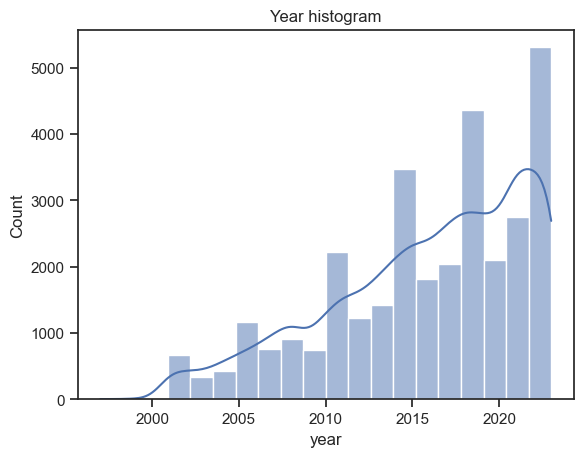

In [42]:
# Creating a histogram to visualize the distribution of the variables 

sns.histplot(df_billio['year'], bins = 20, kde = True).set(title='Year histogram')

In [43]:
# Creating net_worth ranges
df_billio.loc[df_billio['net_worth_billions'] <= 25, 'net_worth_range'] = '< 25 B'
df_billio.loc[(df_billio['net_worth_billions'] > 25) & (df_billio['net_worth_billions'] <= 50), 'net_worth_range'] = '25-50 B'
df_billio.loc[(df_billio['net_worth_billions'] >= 51) & (df_billio['net_worth_billions'] < 100), 'net_worth_range'] = '50-100 B'
df_billio.loc[df_billio['net_worth_billions'] >= 100, 'net_worth_range'] = '> 100 B'

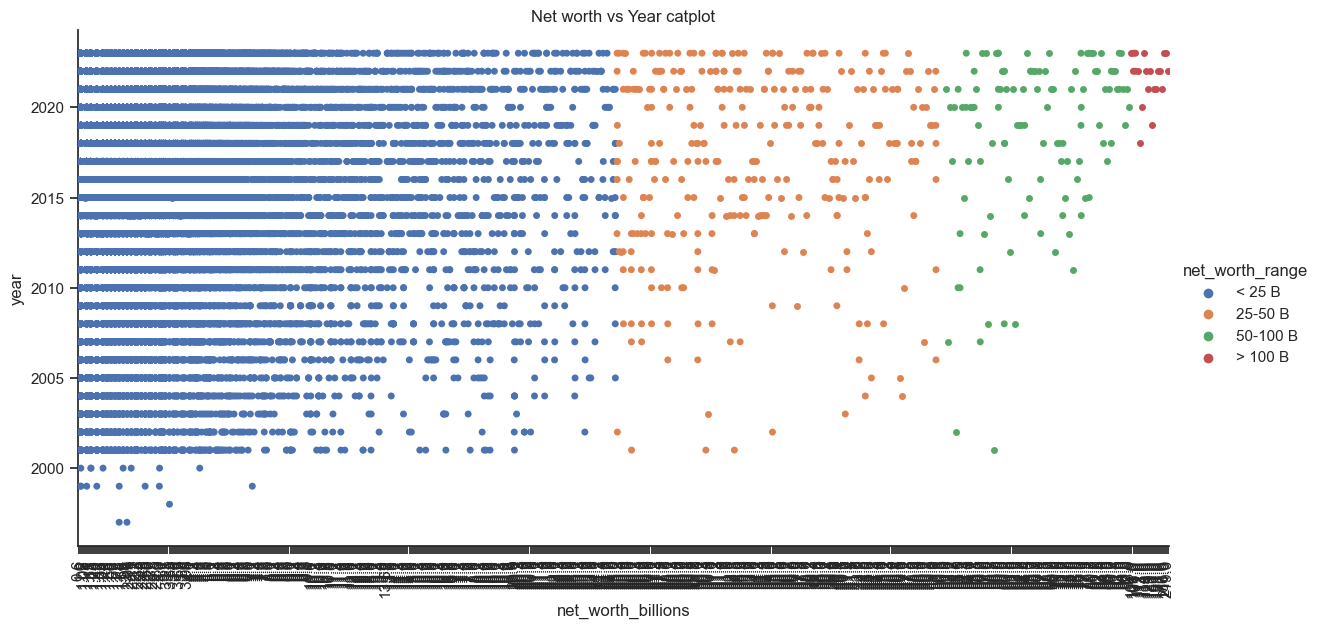

In [44]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
catplot_year = sns.catplot(x="net_worth_billions", y="year", hue="net_worth_range", data=df_billio, height=6, aspect=2).set(title='Net worth vs Year catplot')
catplot_year.set_xticklabels(rotation=90) 

In [45]:
# Export catplot
catplot_year.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3_catplot_year.png'))

### Observations

In the present the majority of billionaires hold fortunes under 25 B. There's a decent in the 25-50 B range. Above 50 B starts being more rare. And there's only a few above 100 B. 
Over time, we can see how above 25 B fortunes only start appearing in the early 2000's and become more and more common over time. Therefore there's an increase in billionaires and higher fortunes over time. Probably due to inflation and digitalization. 

## Business Industries - Net Worth

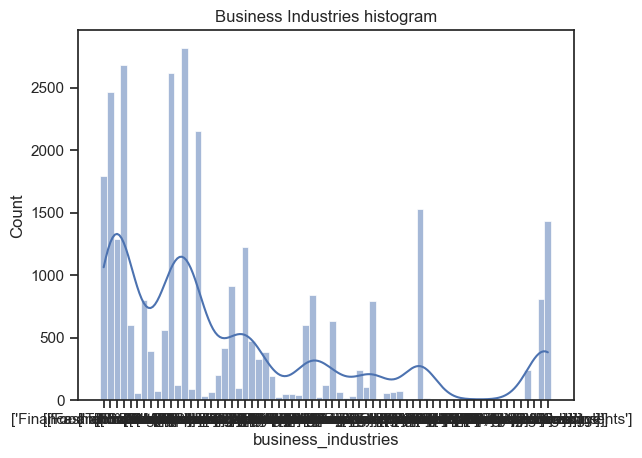

In [46]:
# Creating a histogram to visualize the distribution of the variables 

hist_ind = sns.histplot(df_billio['business_industries'], bins = 30, kde = True).set(title='Business Industries histogram')

In [47]:
# Export histogram
hist_ind.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ind.png'))

AttributeError: 'list' object has no attribute 'figure'

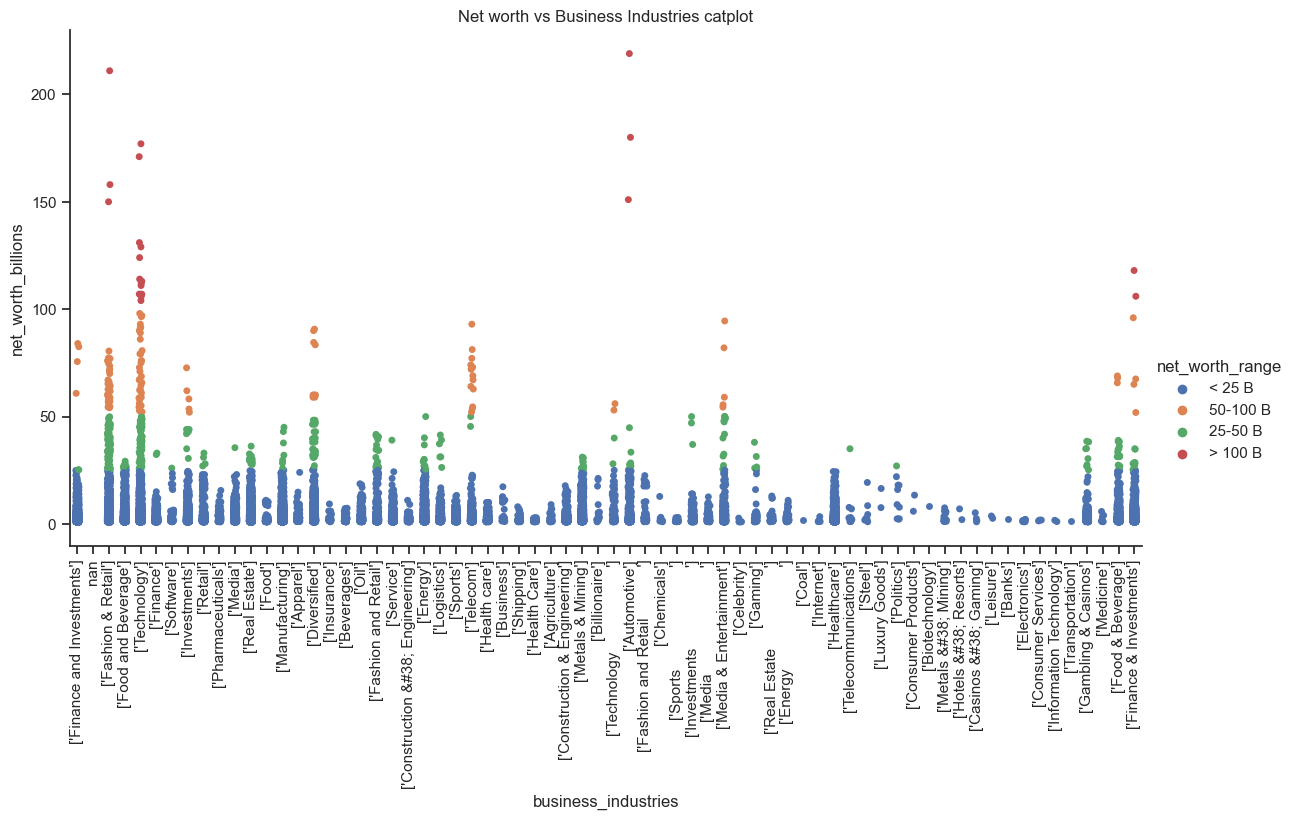

In [48]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
catplot_ind = sns.catplot(x="business_industries", y="net_worth_billions", hue="net_worth_range", data=df_billio, height=6, aspect=2).set(title='Net worth vs Business Industries catplot')
catplot_ind.set_xticklabels(rotation=90) 

In [49]:
# Export catplot 
catplot_ind.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_ind.png'))

# 2.7 Revisit the questions you generated in the previous task

- Examine the relationship between wealth and age?
Over 50 years old hold the biggest fortunes. And we observe a growth of the net worth as the billionaires get older. And smaller net worth on younger people. 
- Explore the gender distribution among billionaire's?
There's a big majority of males. 
And no females go above 80 B net worth, as opposed to men that go above 200 B. 
- What's the average net worth?
4 Billion. 
- Identify the most popular industries?

New questions:
- What are the differences between age distribution and for self-made and inherited fortunes. 
- What’s the average age for self-made billionaires?

# 2.8 Hypothesis

The goal of this analysis is to understand how the wealth of the wealthiest is distributed in the different present variables. 
An interesting hypothesis to test is: "Most billionaires have increased their net worth over time or remained billionaires"
It would be interesting to see the percentage of people who loses the billionaire status. 

# 2.9 Export data

In [50]:
df_billio.head()

,year,rank,net_worth_billions,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status,age_range,net_worth_range
0,1997,1,2.0,Chatri Sophonpanich & family,73.0,Male,Thailand,Thailand,Bangkok,['Finance and Investments'],NaN,NaN,False,NaN,>70,< 25 B
1,1997,2,1.8,King Bhumibol Adulyadej,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,False,NaN,60-70,< 25 B
2,1998,1,3.3,Edmond Safra,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,True,NaN,60-70,< 25 B
3,1999,1,7.1,Dieter Schwarz,59.0,Male,Germany,Germany,Neckarsulm,['Fashion & Retail'],NaN,NaN,True,NaN,50-60,< 25 B
4,1999,2,2.9,Martin Ebner,53.0,Male,Switzerland,Switzerland,Wilen,['Finance and Investments'],NaN,NaN,False,NaN,50-60,< 25 B


In [51]:
#Exporting subset of 2023
df_2023.to_csv(os.path.join(path, '02 Data','Prepared Data', 'all_billionaires_2023.csv'))

In [53]:
#Exporting subset of df_billio with age and net worth ranges
df_billio.to_csv(os.path.join(path, '02 Data','Prepared Data', 'all_billionaires_1997-2023_ranges.csv'))